# Generative Adversarial Nets 논문 정리

## 0. Abstract

- '경쟁‘하는 과정을 통해 generative model을 추정하는 새로운 프레임워크 제안 
- 2개의 모델 학습 

1) generative model(생성 모델), G : training data의 분포를 모사함 -> discriminative model이 구별하지 못하도록

2) discriminative model(판별모델), D : sample 데이터가 G로부터 나온 데이터가 아닌 실제 training data로부터 나온 데이터일 확률을 추정

-G를 학습하는 과정은 D가 sample 데이터가 G로부터 나온 가짜 데이터와 실제 training 데이터를 판별하는데 실수를 할 확률을 최대화하는 것.

-이 논문에서는 이와 같은 프레임워크를 minimax two-player game으로 표현하고 있다. ->이는 논문에서 나오는 방정식으로 확인가능

-임의의 함수 G, D의 공간에서, G가 training 데이터 분포를 모사하게 되면서, D가 실제 training 데이터인지 G가 생성해낸 가짜 데이터인지 판별하는 확률은 1/2가 된다. (즉, 실제 데이터와 G가 생성해내는 데이터의 판별이 어려워짐)

-G와 D가 multi-layer perceptrons으로 정의된 경우, 전체 시스템은 back-propagation을 통해 학습된다

=> 이 논문에서는 GAN이라는 새로운 프레임워크를 제안하고 있으며, 이는 생성 모델과 판별 모델, G, D 두 가지 모델을 학습하며 G는 실제 training data의 분포를 모사하며 그와 비슷한 데이터를 생성하려하고, D는 실제 데이터와 G가 생성해낸 데이터를 구별하려하는 경쟁적인 과정으로 이루어져 있음 

## 1. Introduction

-딥러닝이 작동하는 방식은 인공지능 영역에서 마주하는 데이터의 종류에 대해서 모집단에 근사하는 확률 분포를 나타내는 계층모델을 발견하는 것
지금까지는, 고차원의 방대한 센싱 데이터를 클래스 레이블에 mapping해서 구분하는 모델 사용 ->well-behaved gradient를 갖는 선형 활성화 함수들을 사용한 backpropagation, dropout 알고리즘 기반

-Deep generative model들은 maximum likelihood estimation과 관련된 전략들에서 발생하는 많은 확률 연산들을 근사하는 데 발생하는 어려움과 generative context에서는, 앞서 모델 사용의 큰 성공을 이끌었던 선형 활성화 함수들의 이점들을 가져오는 것의 어려움이 있기 때문에 크게 임팩트 있지 않았음. 

=> 이 논문에서 소개될 새로운 generative model은 이러한 어려움들을 회피한다

-이 논문에서 소개되는 adversarial nets 프레임워크의 컨셉은 ‘경쟁’으로,
discriminative model은 sample data가 G model이 생성해낸 sample data인지, 실제 training data distribution인지 판별하는 것을 학습함

-GAN의 경쟁하는 과정을 경찰(분류 모델, 판별자)과 위조지폐범(생성 모델, 생성자) 사이의 경쟁으로 비유하면, 위조지폐범은 최대한 진짜 같은 화폐를 만들어 경찰을 속이기 위해 노력하고, 경찰은 진짜 화폐와 가짜 화폐를 완벽히 판별하여 위조지폐범을 검거하는 것을 목표로 한다. 이러한 경쟁하는 과정의 반복은 어느 순간 위조지폐범이 진짜와 다를 바 없는 위조지폐를 만들 수 있고 경찰이 위조지폐를 구별할 수 있는 확률 역시 50%로 수렴하게 됨으로써 경찰이 위조지폐와 실제 화폐를 구분할 수 없는 상태에 이르도록 한다. 

=> 결국 GAN의 핵심 컨셉은 각각의 역할을 가진 두 모델을 통해 적대적 학습을 하면서 ‘진짜같은 가짜’를 생성해내는 능력을 키워주는 것

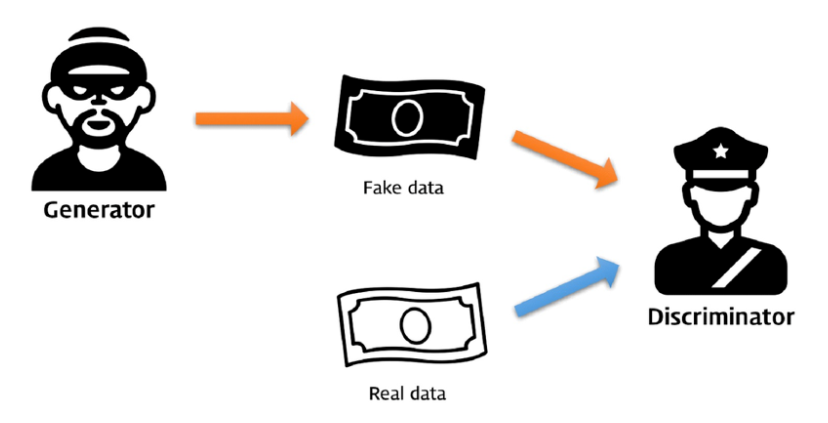

In [2]:
from IPython.display import Image

Image('1.png')

-이 프레임워크는 많은 특별한 학습 알고리즘들과 optimization 알고리즘을 사용할 수 있음
- (abstract)에서 나왔듯이 이 논문에서는 multi-layer perceptron을 사용하면 multilayer perceptron을 쓰면 다른 복잡한 네트워크 필요 없이 오직 forward propagation/ back propagation / dropout algorithm으로 학습 가능

## 3. Adversarial nets

-adversarial modeling 프레임워크는 앞서 말했듯이 가장 간단하므로, multi-layer perceptrons 모델 적용

-학습 초반에는 G가 생성해내는 이미지는 D가 G가 생성해낸 가짜 샘플인지 실제 데이터의 샘플인지 바로 구별할 수 있을 만큼 형편없어, D(G(z))의 결과가 0에 가까움. 즉, z로 부터 G가 생성해낸 이미지가 D가 판별하였을 때 바로 가짜라고 판별할 수 있다고 하는 것을 수식으로 표현한 것이다. 그리고 학습이 진행될수록, G는 실제 데이터의 분포를 모사하면서 D(G(z))의 값이 1이 되도록 발전한다. 이는 G가 생성해낸 이미지가 D가 판별하였을 때 진짜라고 판별해버리는 것을 표현한 것이다.
-> 이 내용을 수식으로 나타낸 것! (아래)


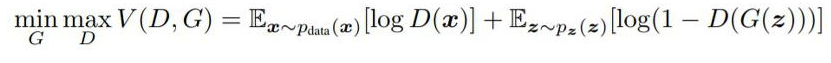

In [4]:
Image('2.png')

-첫번째 항: real data x를 discriminator 에 넣었을 때 나오는 결과를 log취했을 때 얻는 기댓값

-두번째 항: fake data z를 generator에 넣었을 때 나오는 결과를 discriminator에 넣었을 때 그 결과를 log(1-결과)했을 때 얻는 기댓값

-이 방정식을 D의 입장, G의 입장에서 각각 이해해보면,
-먼저 D의 입장에서 이 value function V(D,G)의 이상적인 결과를 생각해보면,
D가 매우 뛰어난 성능으로 판별을 잘 해낸다고 했을 때, D가 판별하려는 데이터가 실제 데이터에서 온 샘플일 경우에는 D(x)가 1이 되어 첫번째 항은 0이 되어 사라지고 G(z)가 생성해낸 가짜 이미지를 구별해낼 수 있으므로 D(G(z))는 0이 되어 두번째 항은 log(1-0)=log1=0이 되어 전체 식 V(D,G) = 0이 된다. 
즉 D의 입장에서 얻을 수 있는 이상적인 결과, '최댓값'은 0임을 확인 할 수 있다

-그 다음 G의 입장에서 이 value function V(D,G)의 이상적인 결과를 생각해보면,
G가 D가 구별못할만큼 진짜와 같은 데이터를 잘 생성해낸다고 했을 때, 첫번째 항은 D가 구별해내는 것에 대한 항으로 G의 성능에 의해 결정될 수 있는 항이 아니므로 패스하고 두번째 항을 살펴보면 G가 생성해낸 데이터는 D를 속일 수 있는 성능이라 가정했기 때문에 D가 G가 생성해낸 이미지를 가짜라고 인식하지 못하고 진짜라고 결정내버린다. 그러므로 D(G(z)) =1이 되고 log(1-1)=log0=마이너스무한대가 된다.
즉, G의 입장에서 얻을 수 있는 이상적인 결과, '최솟값'은 '마이너스무한대'임을 확인할 수 있다.

-다시말해, D는 training data의 sample과 G의 sampl에 진짜인지 가짜인지 올바른 라벨을 지정할 확률을 최대화하기 위해 학습하고, G는 log(1-D(G(z))를 최소화(D(G(z))를 최대화)하기 위해 학습되는 것!

-D입장에서는 V(D,G)를 최대화시키려고, G입장에서는 V(D,G)를 최소화시키려고 하고, 논문에서는 D와 G를 V(G,D)를 갖는 two-player minmax game으로 표현

-또 학습시킬때, inner loop에서 D를 최적화하는 것은 많은 계산들을 필요로 하고 유한한 데이터셋에서는 overfitting을 초래함 
-> 그래서 k step만큼 D를 최적화하고 G는 1 step 만큼 최적화하도록 한다 (알고리즘으로 확인가능)
-앞서 말했듯이, 학습 초반에는 G의 성능이 형편없기 때문에 D가 G가 생성해낸 데이터와 실제 데이터 샘플을 너무 잘 구별해버린다. 이런 경우에는 log(1-D(G(z))가 포화상태가 되므로 log(1-D(G(z))를 최소화하려고 하는 것보다 log(D(G(z))를 최대화되게끔 학습하는 것이 더 좋다. ->G가 형편없을 때에는 log(1-D(G(z))의 gradient를 계산했을 때 너무 작은 값이 나오므로 학습이 느리기 때문

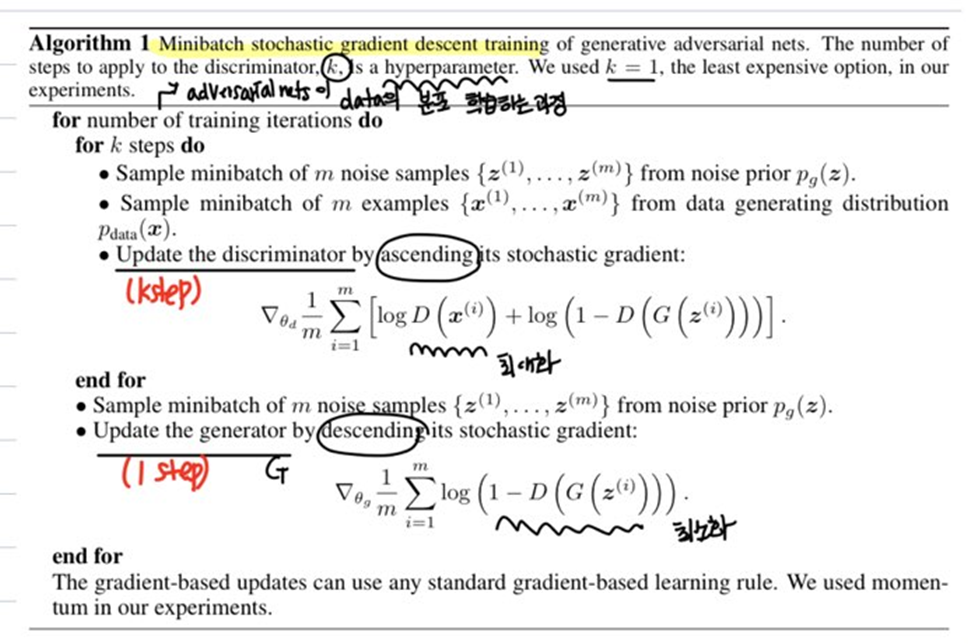

In [12]:
Image('4.png')

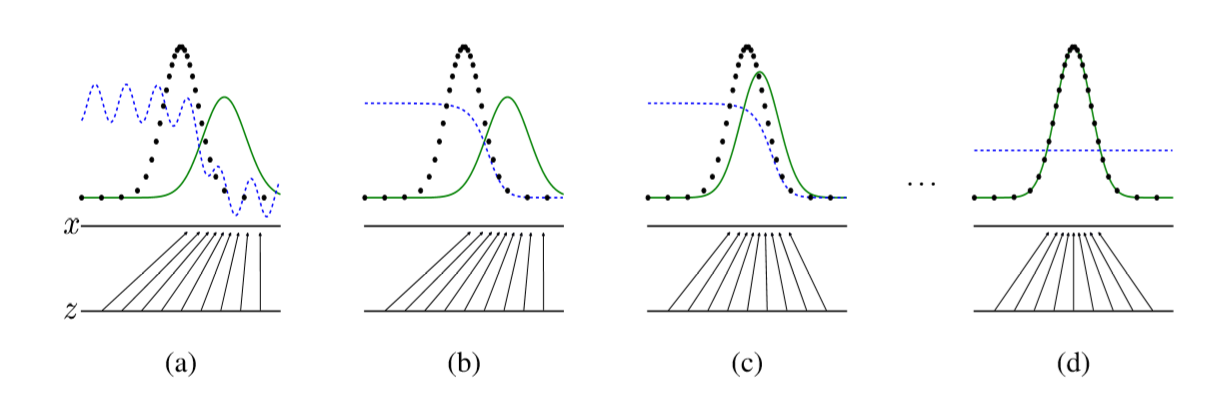

In [5]:
Image('3.png')

(위의 그림에서, 파란색 점선: discriminative distribution, 검은색 점선: data generating distribution(real), 녹색 실선: generative distribution(fake)을 나타냄)

-GAN의 학습과정을 이 그림을 통해 확인해보면,
(a): 학습초기에는 real과 fake의 분포가 전혀 다름. D의 성능도 썩 좋지 않음
(b): D가 (a)처럼 들쑥날쑥하게 확률을 판단하지 않고, 흔들리지 않고 real과 fake를 분명하게 판별해내고 있음을 확인할 수 있다. 이는 D가 성능이 올라갔음을 확인가능
(c): 어느정도 D가 학습이 이루어지면, G는 실제 데이터의 분포를 모사하며 D가 구별하기 힘든 방향으로 학습을 함
(d): 이 과정의 반복의 결과로 real과 fake의 분포가 거의 비슷해져 구분할 수 없을 만큼 G가 학습을 하게되고 결국, D가 이 둘을 구분할 수 없게 되어 확률을 1/2로 계산하게 된다 

-> 이 과정으로 진짜와 가짜 이미지를 구별할 수 없을 만한 데이터를 G가 생성해내고 이게 GAN의 최종 결과라고 볼 수 있음

## 4. Theoretical Results

-앞서 제시되었던 GAN의 minmax problem이 제대로 working을 한다면,  minmax problem이 global minimum에서 unique solution을 가지고 어떠한 조건에 만족하면 그 solution으로 수렴한다는 사실이 증명되어야 한다

-이 부분에서 그 두 가지를 증명하고 있다. 

In [ ]:
#증명부분은 수식이 많아서 따로 정리한거 첨부합니당

## 4.1 Global Optimality of Pg = Pdata

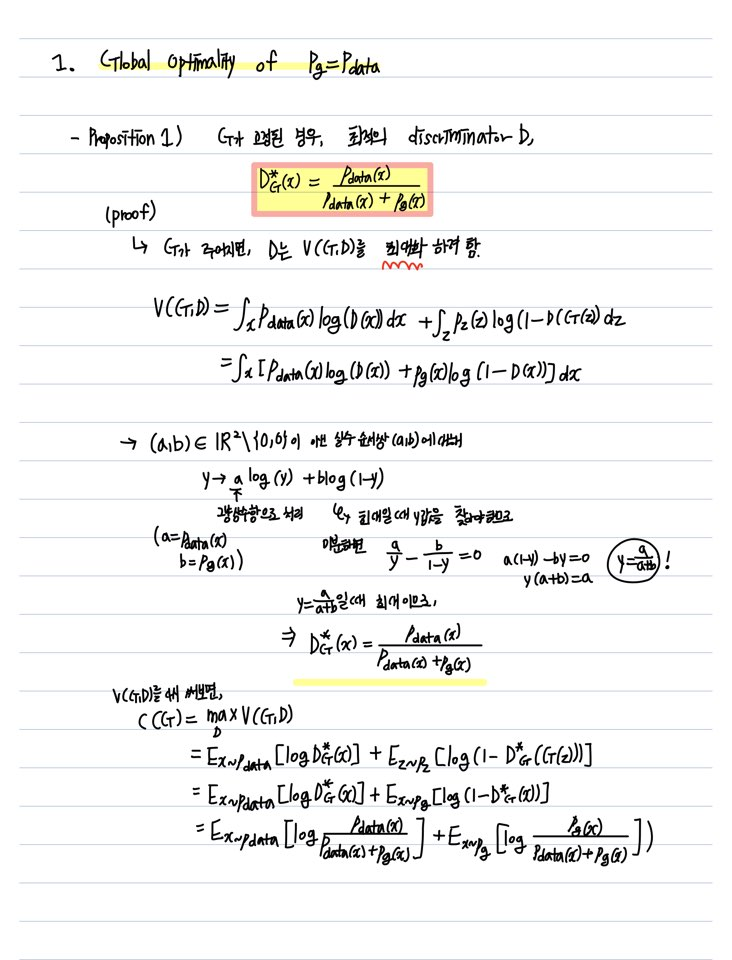

In [8]:
Image('1.jpg')

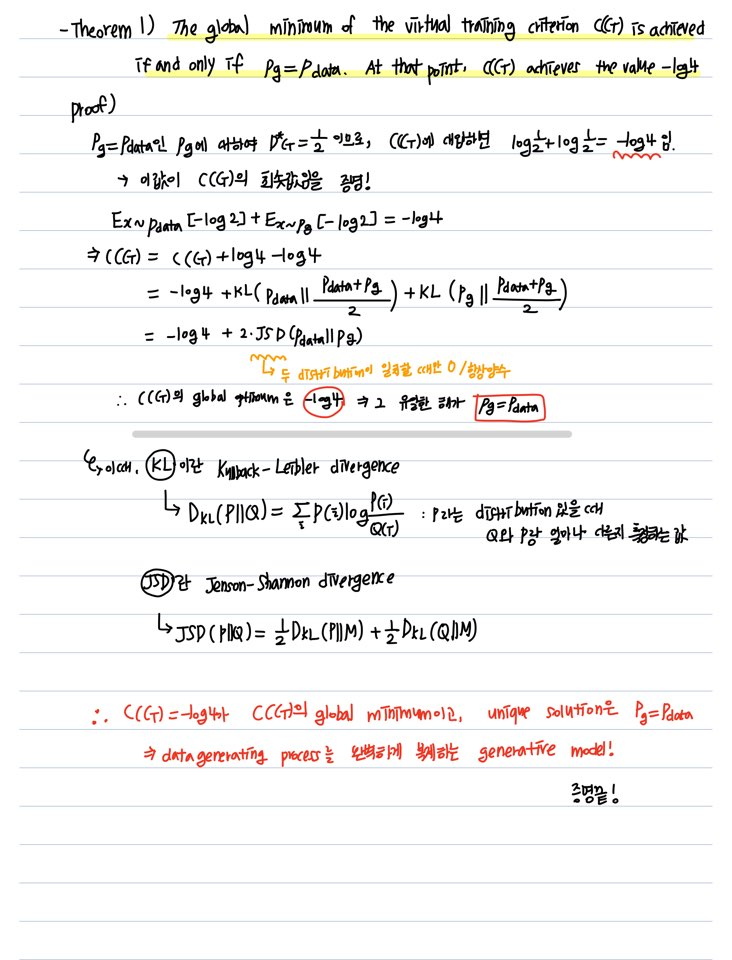

In [9]:
Image('2.jpg')

## 4.2  Convergence of Algorithm1

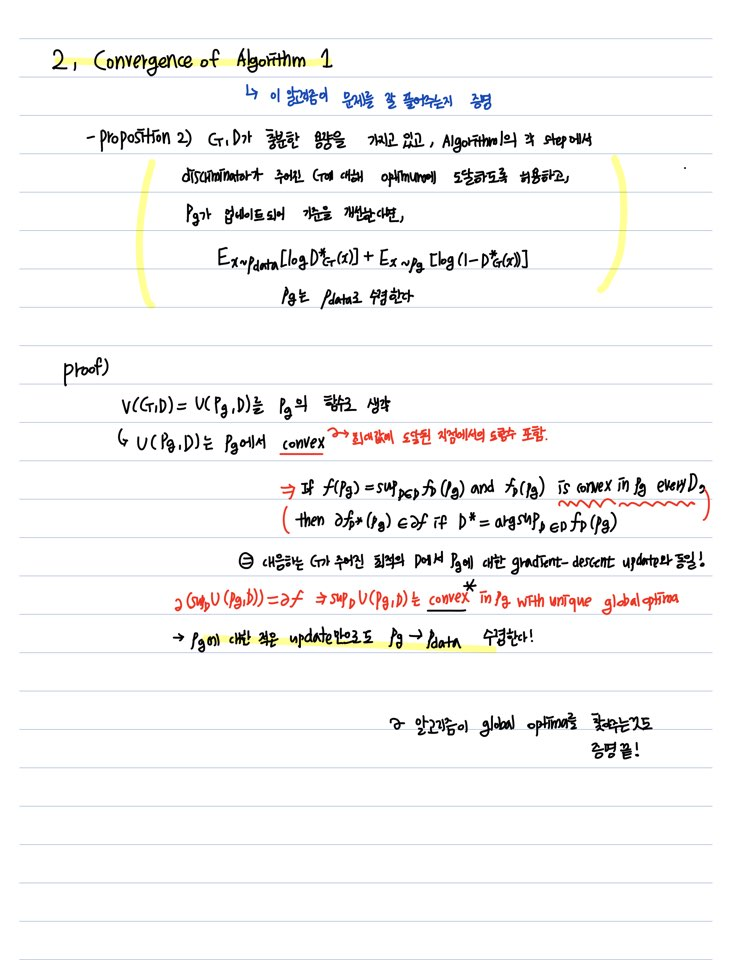

In [10]:
Image('3.jpg')

## 5. Experiments

-MNIST, Toronto Face Database(TFD), CIFAR-10에 대해 학습 진행

-G는 rectifier linear activations, sigmoid 혼합하여 사용, D는 maxout activation사용

-D를 학습시킬 때 Dropout사용

-이론적인 프레임워크에서는 generator의 중간층에 dropout과 noise를 허용하지 않지만, 실험에서는 generator net 맨 하위계층에 input으로 noise 사용함

-이 실험에서는 Gㄹ 생성된 sample에 Gaussian Parzen window맞추고, 해당 분포에 따른 log-likelihood를 알려줌으로써 Pg에 따른 test set data 추정

-> 결과: G가 생성해낸 sample이 기존 존재 방법으로 만든 sample보다 좋다고 주장할 수 는 없지만, 더 나은 생성모델과 경쟁할 수 있다 생각하며, adversarial framework의 잠재력 강조함.

## 6. Advantages and disadvantages

1)단점

-pg(x)가 명시적으로 존재하지 않음

-D와 G가 균형을 잘 맞춰 성능이 향상되어야 함
(G는 D가 너무 발전하기 전에 너무 발전되어서는 안된다. G가 z 데이터를 너무 많이 붕괴시켜버리기 때문)

2)장점

-Markov chains이 전혀 필요 없고 gradients를 얻기 위해 back-propagation만이 사용됨

-학습 중 어떠한 inference가 필요 없음

-다양한 함수들이 모델이 접목될 수 있음

-Markov chains을 쓸 때보다 훨씬 선명한 이미지를 얻을 수 있음

## 7. Conclusions and future work

-conditional generative model로 발전시킬 수 있음 (CGAN)

-Learned approximate inference는 주어진 x를 예측하여 수행될 수 있음

-parameters를 공유하는 conditionals model를 학습함으로써 다른 conditionals models을 근사적으로 모델링할 수 있음. 특히 MP-DBM의 stochastic extension의 구현
에 대부분의 네트워크를 사용할 수 있음

-Semi-supervised learning: 제한된 레이블이 있는 데이터 사용할 수 있을 때, classifiers의 성능 향상시킬 수 있음

-효율성 개선: G,D를 조정하는 더 나은 방법이나 학습하는 동안 sample z에 대한 더 나은 분포를 결정함으로써 학습의 속도 높일 수 있음